# **Prueba 6: conversión de experimentos de actividad neuronal en Igor a Python**

## 1. Importar librería

In [42]:
import IGOR_Python

## 2. Conversión a DataFrames

1. Guardar nombres de archivos en una lista. En este caso, son 32 archivos nombrados del 1 al 32.

In [43]:
archivos_txt = []
for i in range(1, 33):
    archivos_txt.append(f"E{i}.txt")

print(archivos_txt)

['E1.txt', 'E2.txt', 'E3.txt', 'E4.txt', 'E5.txt', 'E6.txt', 'E7.txt', 'E8.txt', 'E9.txt', 'E10.txt', 'E11.txt', 'E12.txt', 'E13.txt', 'E14.txt', 'E15.txt', 'E16.txt', 'E17.txt', 'E18.txt', 'E19.txt', 'E20.txt', 'E21.txt', 'E22.txt', 'E23.txt', 'E24.txt', 'E25.txt', 'E26.txt', 'E27.txt', 'E28.txt', 'E29.txt', 'E30.txt', 'E31.txt', 'E32.txt']


2. Generar una lista para los nombres de archivos csv

In [44]:
archivos_csv = []
for i in range(1, 33):
    archivos_csv.append(f"E{i}.csv")

print(archivos_csv)

['E1.csv', 'E2.csv', 'E3.csv', 'E4.csv', 'E5.csv', 'E6.csv', 'E7.csv', 'E8.csv', 'E9.csv', 'E10.csv', 'E11.csv', 'E12.csv', 'E13.csv', 'E14.csv', 'E15.csv', 'E16.csv', 'E17.csv', 'E18.csv', 'E19.csv', 'E20.csv', 'E21.csv', 'E22.csv', 'E23.csv', 'E24.csv', 'E25.csv', 'E26.csv', 'E27.csv', 'E28.csv', 'E29.csv', 'E30.csv', 'E31.csv', 'E32.csv']


3. Aplicar la función conversor que convierte archivos txt a csv

In [45]:
for archivo_txt, archivo_csv in zip (archivos_txt, archivos_csv):
    IGOR_Python.conversor(archivo_txt, archivo_csv)

4. Editar y guardar en un dataframe

In [46]:
numeros = []  # también puede se el total de canales que se usaron para registrar
for i in range(1, 33):
    numeros.append(i)
print(numeros)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


- Se crea un diccionario de DataFrames para mapear nombres personalizados a cada DataFrame.
NOTA: Crear nombres dinámicos como df1, df2 (variables individuales) no es una buena práctica, ya que se vuelve difícil manejar y acceder a las variables. En su lugar, usar una lista (o un diccionario) es más ordenado y Pythonic.

In [47]:
dataframes = {}
for archivo_csv, numeros in zip (archivos_csv, numeros):
    df = IGOR_Python.edit_dataframe(archivo_csv)
    dataframes[f"df{numeros}"] = df
print(dataframes)

c:\Users\carolina\Desktop\Scripts_Adquisición de datos\IGOR\IGOR_Python.py:27: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  def edit_dataframe(nombre_csv):
c:\Users\carolina\Desktop\Scripts_Adquisición de datos\IGOR\IGOR_Python.py:27: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  def edit_dataframe(nombre_csv):
c:\Users\carolina\Desktop\Scripts_Adquisición de datos\IGOR\IGOR_Python.py:27: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  def edit_dataframe(nombre_csv):
c:\Users\carolina\Desktop\Scripts_Adquisición de datos\IGOR\IGOR_Python.py:27: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  def edit_dataframe(nombre_csv):
c:\Users\carolina\Desktop\Scripts_Adquisición de datos\IGOR\IGOR_Python.py:27: DtypeWarning: Columns (0) have mixed types. Specify dtype option on i

{'df1':           tiempo    voltaje
1        0.00000  57.915001
2        0.00005  53.235001
3        0.00010  50.115002
4        0.00015  57.915001
5        0.00020  65.910004
...          ...        ...
268556  13.42775  25.350000
268557  13.42780  15.990000
268558  13.42785  40.365002
268559  13.42790  37.830002
268560  13.42795  31.590000

[268560 rows x 2 columns], 'df2':           tiempo    voltaje
1        0.00000  70.394997
2        0.00005  53.820000
3        0.00010  57.915001
4        0.00015  49.529999
5        0.00020  62.009998
...          ...        ...
268556  13.42775  36.270000
268557  13.42780  38.610001
268558  13.42785  32.564999
268559  13.42790  42.705002
268560  13.42795  48.555000

[268560 rows x 2 columns], 'df3':           tiempo    voltaje
1        0.00000  56.744999
2        0.00005  65.519997
3        0.00010  65.519997
4        0.00015  79.949997
5        0.00020  54.990002
...          ...        ...
268556  13.42775  64.544998
268557  13.42780  68.44500

5. Graficar dataframes

- DataFrame 1:

In [48]:
dataframes["df1"].head()

,tiempo,voltaje
1,0.00000,57.915001
2,0.00005,53.235001
3,0.00010,50.115002
4,0.00015,57.915001
5,0.00020,65.910004


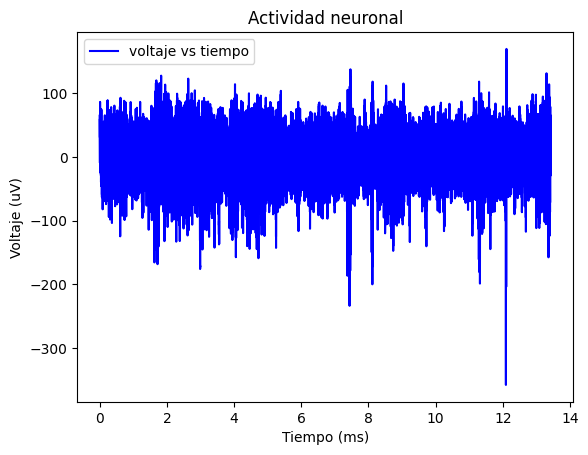

In [49]:
IGOR_Python.plot_dataframe(dataframes["df1"])

- DataFrame 32:

In [50]:
dataframes["df32"].head()

,tiempo,voltaje
1,0.00000,7.410000
2,0.00005,-22.620001
3,0.00010,-37.049999
4,0.00015,-25.350000
5,0.00020,-4.290000


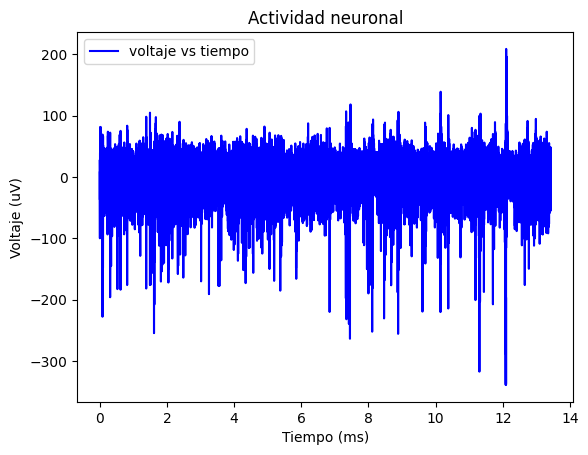

In [51]:
IGOR_Python.plot_dataframe(dataframes["df32"])

# 3. Unir en un solo DataFrame

In [52]:
from functools import reduce
import pandas as pd

# Realizar el merge de todos los DataFrames en el diccionario
resultado = reduce(lambda left, right: pd.merge(left, right, on='tiempo'), dataframes.values())

resultado.head()


C:\Users\carolina\AppData\Local\Temp\ipykernel_25156\2325304706.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'voltaje_x'} in the result is deprecated and will raise a MergeError in a future version.
  resultado = reduce(lambda left, right: pd.merge(left, right, on='tiempo'), dataframes.values())
C:\Users\carolina\AppData\Local\Temp\ipykernel_25156\2325304706.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'voltaje_x'} in the result is deprecated and will raise a MergeError in a future version.
  resultado = reduce(lambda left, right: pd.merge(left, right, on='tiempo'), dataframes.values())
C:\Users\carolina\AppData\Local\Temp\ipykernel_25156\2325304706.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'voltaje_x'} in the result is deprecated and will raise a MergeError in a future version.
  resultado = reduce(lambda left, right: pd.merge(left, right, on='tiempo'), dataframes.values())
C:\Users\carolina\AppData\Local

,tiempo,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,...,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,voltaje_y,voltaje_x,voltaje_y
0,0.00000,57.915001,70.394997,56.744999,66.495003,31.004999,28.665001,35.294998,37.049999,21.450001,...,-9.165,-18.330,-16.575001,13.455,4.290,-19.889999,-6.240,10.530,14.820,7.410000
1,0.00005,53.235001,53.820000,65.519997,56.549999,24.375000,40.169998,45.435001,34.904999,8.580000,...,-12.285,-12.285,-18.915001,11.700,-12.285,-14.235000,-0.975,0.195,14.235,-22.620001
2,0.00010,50.115002,57.915001,65.519997,40.365002,29.445000,43.290001,29.055000,32.369999,26.520000,...,-9.165,-15.015,-19.110001,17.355,-9.360,-8.775000,-9.750,3.315,-5.070,-37.049999
3,0.00015,57.915001,49.529999,79.949997,46.605000,31.395000,47.580002,28.469999,37.244999,8.970000,...,-0.780,-10.530,-15.210000,14.235,-6.045,-32.564999,-10.335,6.240,-15.405,-25.350000
4,0.00020,65.910004,62.009998,54.990002,39.389999,29.639999,49.334999,32.174999,43.290001,15.210000,...,-11.700,-1.950,-23.010000,18.330,-4.290,-5.265000,-21.840,-7.020,-0.780,-4.290000


- Renombrar columnas.

In [57]:
# Lista con los nuevos encabezados
encabezados = ['tiempo']
for i in range(1, 33):
    encabezados.append(f"E{i}")
print(encabezados)

['tiempo', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32']


In [58]:
# Renombrar las columnas
resultado.columns = [encabezados]
resultado.head()

,tiempo,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E23,E24,E25,E26,E27,E28,E29,E30,E31,E32
0,0.00000,57.915001,70.394997,56.744999,66.495003,31.004999,28.665001,35.294998,37.049999,21.450001,...,-9.165,-18.330,-16.575001,13.455,4.290,-19.889999,-6.240,10.530,14.820,7.410000
1,0.00005,53.235001,53.820000,65.519997,56.549999,24.375000,40.169998,45.435001,34.904999,8.580000,...,-12.285,-12.285,-18.915001,11.700,-12.285,-14.235000,-0.975,0.195,14.235,-22.620001
2,0.00010,50.115002,57.915001,65.519997,40.365002,29.445000,43.290001,29.055000,32.369999,26.520000,...,-9.165,-15.015,-19.110001,17.355,-9.360,-8.775000,-9.750,3.315,-5.070,-37.049999
3,0.00015,57.915001,49.529999,79.949997,46.605000,31.395000,47.580002,28.469999,37.244999,8.970000,...,-0.780,-10.530,-15.210000,14.235,-6.045,-32.564999,-10.335,6.240,-15.405,-25.350000
4,0.00020,65.910004,62.009998,54.990002,39.389999,29.639999,49.334999,32.174999,43.290001,15.210000,...,-11.700,-1.950,-23.010000,18.330,-4.290,-5.265000,-21.840,-7.020,-0.780,-4.290000


- Guardar en un archivo csv.

In [61]:
resultado.to_csv('Test1_32 sites_140825_210355.csv', sep=',')